In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir(r"C:\Users\hyeon jin\Downloads\asiasummer3\kaggleCreditAnalysis\data3")
train_df = pd.read_csv('cs-training.csv', header='infer',encoding='latin1')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [2]:
train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)
#train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)



In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


# 1번 set

### MonthlyIncome 0, 1, NaN 삭제

In [5]:
con1 = train_df[(train_df['MonthlyIncome'] <= 1) | (train_df['MonthlyIncome'].isnull() == True)]
#con1 = train_df[(train_df['DebtRatio'] > a.quantile([.75]).values[0])]
con1.index

Int64Index([     6,      8,     14,     16,     32,     41,     44,     50,
                52,     58,
            ...
            149960, 149963, 149965, 149967, 149975, 149976, 149977, 149984,
            149992, 149997],
           dtype='int64', length=31970)

In [7]:
con1.index[31969]

149997

In [8]:
train_df = train_df.drop(train_df.index[con1.index[0:31969].values])

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118031 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              118031 non-null int64
SeriousDlqin2yrs                        118031 non-null int64
RevolvingUtilizationOfUnsecuredLines    118031 non-null float64
age                                     118031 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    118031 non-null int64
DebtRatio                               118031 non-null float64
MonthlyIncome                           118030 non-null float64
NumberOfOpenCreditLinesAndLoans         118031 non-null int64
NumberOfTimes90DaysLate                 118031 non-null int64
NumberRealEstateLoansOrLines            118031 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    118031 non-null int64
NumberOfDependents                      118031 non-null float64
dtypes: float64(4), int64(8)
memory usage: 11.7 MB


In [10]:
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118031 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              118031 non-null int64
SeriousDlqin2yrs                        118031 non-null int64
RevolvingUtilizationOfUnsecuredLines    118031 non-null float64
age                                     118031 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    118031 non-null int64
DebtRatio                               118031 non-null float64
MonthlyIncome                           118031 non-null float64
NumberOfOpenCreditLinesAndLoans         118031 non-null int64
NumberOfTimes90DaysLate                 118031 non-null int64
NumberRealEstateLoansOrLines            118031 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    118031 non-null int64
NumberOfDependents                      118031 non-null float64
dtypes: float64(4), int64(8)
memory usage: 11.7 MB


# 2번 set

### MonthlyIncome 0, 1, NaN 삭제 -> DebtRatio 상위 25% 삭제 -> MontylyIncome median 처리

In [4]:
a = train_df.loc[:,'DebtRatio']
a.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [5]:
train_df['DebtRatio'].quantile([.75]).values[0]

0.86825377325

In [6]:
con1 = train_df[(train_df['MonthlyIncome'] <= 1) | (train_df['MonthlyIncome'].isnull() == True)]
con1 = con1[(con1['DebtRatio'] > con1['DebtRatio'].quantile([.75]).values[0])]
con1.index

Int64Index([     6,     50,     58,     73,     86,     90,     92,    109,
               124,    141,
            ...
            149870, 149885, 149922, 149923, 149924, 149932, 149958, 149975,
            149992, 149997],
           dtype='int64', length=7992)

In [7]:
con1.index[7991]

149997

In [8]:
train_df = train_df.drop(train_df.index[con1.index[0:7991].values])

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142009 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              142009 non-null int64
SeriousDlqin2yrs                        142009 non-null int64
RevolvingUtilizationOfUnsecuredLines    142009 non-null float64
age                                     142009 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    142009 non-null int64
DebtRatio                               142009 non-null float64
MonthlyIncome                           119865 non-null float64
NumberOfOpenCreditLinesAndLoans         142009 non-null int64
NumberOfTimes90DaysLate                 142009 non-null int64
NumberRealEstateLoansOrLines            142009 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    142009 non-null int64
NumberOfDependents                      142009 non-null float64
dtypes: float64(4), int64(8)
memory usage: 14.1 MB


In [10]:
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142009 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              142009 non-null int64
SeriousDlqin2yrs                        142009 non-null int64
RevolvingUtilizationOfUnsecuredLines    142009 non-null float64
age                                     142009 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    142009 non-null int64
DebtRatio                               142009 non-null float64
MonthlyIncome                           142009 non-null float64
NumberOfOpenCreditLinesAndLoans         142009 non-null int64
NumberOfTimes90DaysLate                 142009 non-null int64
NumberRealEstateLoansOrLines            142009 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    142009 non-null int64
NumberOfDependents                      142009 non-null float64
dtypes: float64(4), int64(8)
memory usage: 14.1 MB


# 3번 set

### DebtRatio 상위 25% 삭제 -> MonthlyIncome median 처리

In [4]:
con1 = train_df[(train_df['DebtRatio'] > train_df['DebtRatio'].quantile([.75]).values[0])]

In [5]:
con1.index

Int64Index([     6,      8,     14,     16,     25,     32,     41,     44,
                50,     58,
            ...
            149960, 149963, 149965, 149967, 149975, 149976, 149977, 149984,
            149992, 149997],
           dtype='int64', length=37500)

In [6]:
train_df = train_df.drop(train_df.index[con1.index[0:37499].values])

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112501 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              112501 non-null int64
SeriousDlqin2yrs                        112501 non-null int64
RevolvingUtilizationOfUnsecuredLines    112501 non-null float64
age                                     112501 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    112501 non-null int64
DebtRatio                               112501 non-null float64
MonthlyIncome                           110878 non-null float64
NumberOfOpenCreditLinesAndLoans         112501 non-null int64
NumberOfTimes90DaysLate                 112501 non-null int64
NumberRealEstateLoansOrLines            112501 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    112501 non-null int64
NumberOfDependents                      112501 non-null float64
dtypes: float64(4), int64(8)
memory usage: 11.2 MB


In [9]:
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112501 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              112501 non-null int64
SeriousDlqin2yrs                        112501 non-null int64
RevolvingUtilizationOfUnsecuredLines    112501 non-null float64
age                                     112501 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    112501 non-null int64
DebtRatio                               112501 non-null float64
MonthlyIncome                           112501 non-null float64
NumberOfOpenCreditLinesAndLoans         112501 non-null int64
NumberOfTimes90DaysLate                 112501 non-null int64
NumberRealEstateLoansOrLines            112501 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    112501 non-null int64
NumberOfDependents                      112501 non-null float64
dtypes: float64(4), int64(8)
memory usage: 11.2 MB


# 4번 set

### 2번 set + XDay 공통되는 96, 98 (총 269)개 삭제

In [10]:
a = train_df.loc[:,'NumberOfTimes90DaysLate']
a.value_counts().sort_index()

0     133951
1       5056
2       1507
3        648
4        278
5        123
6         78
7         36
8         21
9         19
10         8
11         4
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [11]:
b = train_df.loc[:,'NumberOfTime30-59DaysPastDueNotWorse']
b.value_counts().sort_index()

0     119362
1      15166
2       4337
3       1651
4        685
5        314
6        131
7         52
8         24
9         11
10         3
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [12]:
c = train_df.loc[:,'NumberOfTime60-89DaysPastDueNotWorse']
c.value_counts().sort_index()

0     134734
1       5480
2       1064
3        306
4         96
5         31
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [13]:
train_df = train_df[(train_df['NumberOfTimes90DaysLate'] < 96) | (train_df['NumberOfTime30-59DaysPastDueNotWorse'] < 96) | (train_df['NumberOfTime60-89DaysPastDueNotWorse'] < 96)]

# 5번 set

### 2번 set + 기존 Revolving 처리 방식 (10000이상을 대체값으로)

In [12]:
#train_df.NumberRealEstateLoansOrLines[30587] = 32
for i in train_df[train_df['RevolvingUtilizationOfUnsecuredLines'] > 10000].index:
    train_df['RevolvingUtilizationOfUnsecuredLines'][i] = 9684

C:\Users\hyeon jin\AppData\Local\conda\conda\envs\study\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# 6번 set

### 2번 set +  Revolving 1000개 이상 모두 삭제

In [10]:
train_df = train_df[(train_df['RevolvingUtilizationOfUnsecuredLines'] <= 1000)]

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141853 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              141853 non-null int64
SeriousDlqin2yrs                        141853 non-null int64
RevolvingUtilizationOfUnsecuredLines    141853 non-null float64
age                                     141853 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    141853 non-null int64
DebtRatio                               141853 non-null float64
MonthlyIncome                           141853 non-null float64
NumberOfOpenCreditLinesAndLoans         141853 non-null int64
NumberOfTimes90DaysLate                 141853 non-null int64
NumberRealEstateLoansOrLines            141853 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    141853 non-null int64
NumberOfDependents                      141853 non-null float64
dtypes: float64(4), int64(8)
memory usage: 14.1 MB


# 7번 set

### 2번 set + Revolving 1000개 이상 대체값

In [10]:
#train_df.NumberRealEstateLoansOrLines[30587] = 32
for i in train_df[train_df['RevolvingUtilizationOfUnsecuredLines'] > 1000].index:
    train_df['RevolvingUtilizationOfUnsecuredLines'][i] = 999

C:\Users\hyeon jin\AppData\Local\conda\conda\envs\study\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# 8번 set

### 2번 set + Revolving 1000개 이상 중 SeriousDlqin2yrs가 0인 것 삭제

In [10]:
e = train_df[(train_df['RevolvingUtilizationOfUnsecuredLines'] > 1000) & (train_df['SeriousDlqin2yrs'] == 0)]

In [11]:
e.index

Int64Index([   293,   2331,   4278,   4793,   6850,   7774,   8199,   9162,
             10460,  10695,
            ...
            139709, 140814, 142582, 143678, 144354, 144683, 145587, 149102,
            149160, 149279],
           dtype='int64', length=147)

In [12]:
train_df = train_df.drop(train_df.index[con1.index[0:146].values])

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141863 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              141863 non-null int64
SeriousDlqin2yrs                        141863 non-null int64
RevolvingUtilizationOfUnsecuredLines    141863 non-null float64
age                                     141863 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    141863 non-null int64
DebtRatio                               141863 non-null float64
MonthlyIncome                           141863 non-null float64
NumberOfOpenCreditLinesAndLoans         141863 non-null int64
NumberOfTimes90DaysLate                 141863 non-null int64
NumberRealEstateLoansOrLines            141863 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    141863 non-null int64
NumberOfDependents                      141863 non-null float64
dtypes: float64(4), int64(8)
memory usage: 14.1 MB


In [14]:
train_y = train_df['SeriousDlqin2yrs']
train_X = train_df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1)
print(train_X.shape)
print(train_y.shape)

(141863, 10)
(141863,)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)

In [16]:

train_X = np.array(train_X)
train_y = np.array(train_y)

In [17]:

DATA_PATH = 'C:/Users/hyeon jin/Downloads/asiasummer3/kaggleCreditAnalysis/result'

TRAIN_INPUT_DATA = 'train_data_X_2_8.npy'
TRAIN_LABEL_DATA = 'train_data_y_2_8.npy'

np.save(open(DATA_PATH + TRAIN_INPUT_DATA, 'wb'), train_X)
np.save(open(DATA_PATH + TRAIN_LABEL_DATA, 'wb'), train_y)

In [22]:
train_df0 = train_df[train_df.SeriousDlqin2yrs!=0]

In [23]:
mask = train_df0['SeriousDlqin2yrs'].notnull()#notnull()는 관측치가 결측`b`b이면 False, 결측이 아니면 True를 반환

In [26]:
bins2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100,
       train_df0['DebtRatio'].max()] #월별 부채지급
labels2 = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9'
           , '0.9-1.0', '1.0-2.0', '2.0-5.0','5.0-10.0','10.0-20.0','20.0-50.0','50.0-100.0','100+']
train_df0['dr_grouped'] = pd.cut(train_df0['DebtRatio'], bins2, right=0,labels=labels2)
gb2 = train_df0[mask].groupby('dr_grouped')['SeriousDlqin2yrs']
pd.concat([gb2.count(), gb2.mean()], axis=1)

C:\Users\hyeon jin\AppData\Local\conda\conda\envs\study\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SeriousDlqin2yrs,SeriousDlqin2yrs
dr_grouped,,
0-0.1,1445,1
0.1-0.2,1130,1
0.2-0.3,1090,1
0.3-0.4,1067,1
0.4-0.5,914,1
0.5-0.6,742,1
0.6-0.7,519,1
0.7-0.8,374,1
0.8-0.9,246,1


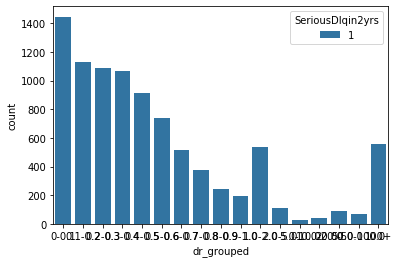

In [28]:
sns.countplot(data=train_df0, x='dr_grouped', hue='SeriousDlqin2yrs')

In [183]:
d = train_df.loc[:,'RevolvingUtilizationOfUnsecuredLines']
d.value_counts().sort_index()
d2 = train_df[(train_df['RevolvingUtilizationOfUnsecuredLines'] <=1000)]
d2.loc[:,'RevolvingUtilizationOfUnsecuredLines'].value_counts().sort_index()
#d2
#d.value_counts().sort_index()
e = train_df[(train_df['RevolvingUtilizationOfUnsecuredLines'] > 1000) & (train_df['SeriousDlqin2yrs'] == 0)]
#e = train_df.loc[:,'RevolvingUtilizationOfUnsecuredLines']
e.loc[:, 'RevolvingUtilizationOfUnsecuredLines'].value_counts().sort_index()
e.index

Int64Index([  9162,  10460,  10695,  11131,  13669,  14564,  16800,  16956,
             17457,  18502,
            ...
            140814, 142582, 143678, 143754, 144354, 144683, 145587, 149102,
            149160, 149279],
           dtype='int64', length=155)